<a href="https://colab.research.google.com/github/pjablonski123/alk_eye-tech/blob/master/eva_3_4c_dss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator 
from keras.applications.inception_v3 import InceptionV3
from keras.applications import VGG16
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Model 
from keras.models import Sequential
from keras import optimizers 
from keras import layers
from keras import models
import matplotlib.pyplot as plt 
%matplotlib inline
from keras.models import load_model

In [2]:
import tensorflow as tf

#pretrained = tf.keras.applications.inception_v3.InceptionV3(layers=tf.keras.layers, weights='imagenet')

In [3]:
cd '/content/drive/My Drive/TEST1'

/content/drive/My Drive/TEST1


In [4]:
# pre-trained Inception V3 model 
#base_model = InceptionV3(layers=tf.keras.layers, weights='imagenet', include_top=False) 
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False

model = models.Sequential()
model.add(base_model)

model.add(GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

#adam = optimizers.adam(lr=0.001)
#model.compile(optimizer=adam, loss='categorical_crossentropy', 
#              metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'])

58892288/58889256 [==============================] - 2s 0us/step


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 9, 9, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
horizontal_flip=True, fill_mode='nearest')

#train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 
train_dir = '/content/drive/My Drive/TEST1/' 
test_dir = '/content/drive/My Drive/TEST2/'

In [9]:
train_generator = train_datagen.flow_from_directory( train_dir,
  target_size=(299, 299), batch_size=10, class_mode='categorical')

test_generator = test_datagen.flow_from_directory( test_dir,
  target_size=(299, 299), batch_size=10, class_mode='categorical')

Found 1165 images belonging to 4 classes.
Found 413 images belonging to 4 classes.


In [10]:
# Setup a callback to save the best model 
callbacks = [keras.callbacks.ModelCheckpoint(
  'model.{epoch:02d}-{val_accuracy:.2f}.hdf5', 
  monitor='val_accuracy', verbose=1, save_best_only=True, 
  mode='max', period=1)]

In [19]:
history = model.fit_generator(train_generator, verbose=1, 
  steps_per_epoch=len(train_generator), epochs=10,
  validation_data=test_generator,
  validation_steps=len(test_generator), callbacks=callbacks)

Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.5947 - accuracy: 0.7734
Epoch 00001: val_accuracy did not improve from 0.67797
117/117 [==============================] - 45s 381ms/step - loss: 0.5947 - accuracy: 0.7734 - val_loss: 1.0473 - val_accuracy: 0.6102
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.5581 - accuracy: 0.7948
Epoch 00002: val_accuracy improved from 0.67797 to 0.68039, saving model to model.02-0.68.hdf5
117/117 [==============================] - 45s 382ms/step - loss: 0.5581 - accuracy: 0.7948 - val_loss: 0.8406 - val_accuracy: 0.6804
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.5412 - accuracy: 0.7931
Epoch 00003: val_accuracy did not improve from 0.68039
117/117 [==============================] - 45s 381ms/step - loss: 0.5412 - accuracy: 0.7931 - val_loss: 1.1645 - val_accuracy: 0.6271
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.5273 - accuracy: 0.8077
Epoch 000

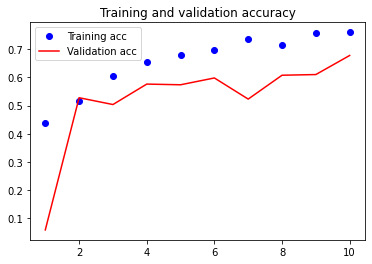

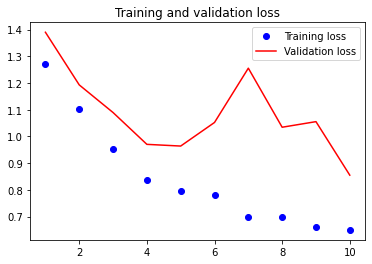

In [12]:
def plot_history(history): 
    acc = history.history['accuracy'] 
    val_acc = history.history['val_accuracy'] 
    loss = history.history['loss'] 
    val_loss = history.history['val_loss'] 
    epochs = range(1, len(acc) + 1) 
    
    plt.figure() 
    plt.title('Training and validation accuracy') 
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', color='red', \
      label='Validation acc') 
    plt.legend() 
    plt.show() 
   
    plt.figure() 
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', color='red', \
      label='Validation loss') 
    plt.legend() 
    plt.show() 
    return acc, val_acc, loss, val_loss 

acc, val_acc, loss, val_loss = plot_history(history)

In [15]:
cd '/content/drive/My Drive/TEST1'

/content/drive/My Drive/TEST1


In [16]:
model.load_weights("model.09-0.94.hdf5")

#model = load_model('model.09-0.94.hdf5')

OSError: ignored

In [13]:
classes = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

def preprocess_input(x):
    x = img_to_array(x) / 255.
    return np.expand_dims(x, axis=0) 

# Prediction for an image path in the local directory
def predict_from_image_path(image_path):
    return predict_image(load_img(image_path, target_size=(299, 299)))

# Prediction for an image URL path
def predict_from_image_url(image_url):
    res = requests.get(image_url)
    im = Image.open(BytesIO(res.content))
    return predict_from_image_path(im.fp)
    
# Predict an image
def predict_image(im):
    x = preprocess_input(im)
    pred = np.argmax(model.predict(x))
    return pred, classes[pred]

In [14]:
#Picture with CNV
print(predict_from_image_path('/content/drive/My Drive/TEST2/test2c.jpeg'))

(0, 'CNV')


In [15]:
#Picture without an eye disease
print(predict_from_image_path('/content/drive/My Drive/TEST2/test2n.jpeg'))

(3, 'NORMAL')


In [16]:
#CNV again
print(predict_from_image_path('/content/drive/My Drive/TEST2/no-disease-cnv-28682-8.jpeg'))

(0, 'CNV')


In [17]:
#NORMAL
print(predict_from_image_path('/content/drive/My Drive/TEST2/test1n.jpeg'))

(3, 'NORMAL')


In [18]:
#DRUSEN
print(predict_from_image_path('/content/drive/My Drive/TEST3/DRUSEN/DRUSEN-9837663-1.jpeg'))

(2, 'DRUSEN')
